Biblioteki potrzebne do wykonania zadania.

In [20]:
import random
import matplotlib.pyplot as plt
import sys
import psutil

Klasa "*RangeTree2D*" - reprezentacja drzewa zakresów dwuwymiarowych.

Klasa wewnętrzna "Node" - reprezentacja węzeł drzewa.

In [21]:
class RangeTree2D:
    def __init__(self, points):
        self.root = self.construct_tree(points) #Tworzenie korzenia drzewa

    #Klasa wewnetrzna
    class Node:
        def __init__(self, point):
            self.point = point
            self.left = None
            self.right = None

    #Funkcja tworzenia węzła na podstawie podanych punktów
    def construct_tree(self, points):
      #Sprawdzenie, czy lista punktów jest nie jest pusta
        if not points:
            return None

        points.sort(key=lambda x: x[0])     #Sortowanie listy punktów względem współrzędnej x
        mid = len(points) // 2    #Index środkowy listy punktów

        node = self.Node(points[mid])
        node.left = self.construct_tree(points[:mid])   #Lewe poddrzewo
        node.right = self.construct_tree(points[mid + 1:])  #Prawe poddrzewo

        return node

    #Funkcja zwracająca liczbę punktów w drzewie, które mieszczą się w podanym zakresie dwuwymirowym
    def query_range(self, node, x1, x2, y1, y2):
      #Jeżeli węzeł jest pusty
        if not node:
            return 0

        #Sprwdzenie czy wspórzędna x punktu węzła jest zmniejsza od x1
        if node.point[0] < x1:
            return self.query_range(node.right, x1, x2, y1, y2)
        #Sprawdzenie czy współrzędna x punktu jest wieksza niz x2
        elif node.point[0] > x2:
            return self.query_range(node.left, x1, x2, y1, y2)
        else:
          #Sprawdzenie, czy współrzędna y punktu jest w zakresie od y1 do y2
            if y1 <= node.point[1] <= y2:
              #Zwrócenie 1 + liczba punktów w lewym poddrzewie + liczba punktów w prawym poddrzewie z zakresu y1 do y2
                return 1 + self.query_range(node.left, x1, x2, y1, y2) + self.query_range(node.right, x1, x2, y1, y2)
            else:
              #Zwrócenie sumy liczby punktów w lewym i prawym poddrzewie, które mieszczą się w zakresie
                return self.query_range(node.left, x1, x2, y1, y2) + self.query_range(node.right, x1, x2, y1, y2)

Funkcja do generowania losowych punktów dwuwymiarowych z przedziału od 0 do 100.

In [4]:
def generate_points(num_points):
    return [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_points)]

Funkcja służąca do wizualizacji danych.

In [28]:
def visualize_range_query(points, x1, x2, y1, y2):
    plt.figure(figsize=(10, 6))
    plt.plot([point[0] for point in points], [point[1] for point in points], color='pink', marker='o')
    plt.axvline(x=x1, color='lightblue', linestyle='--')
    plt.axvline(x=x2, color='lightblue', linestyle='--')
    plt.axhline(y=y1, color='lightblue', linestyle='--')
    plt.axhline(y=y2, color='lightblue', linestyle='--')
    plt.title("Range Tree 2D")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.show()

Program główny:

Number of points in range [20-80, 20-80]: 8
Memory usage for 20 points: 594.484375 MB


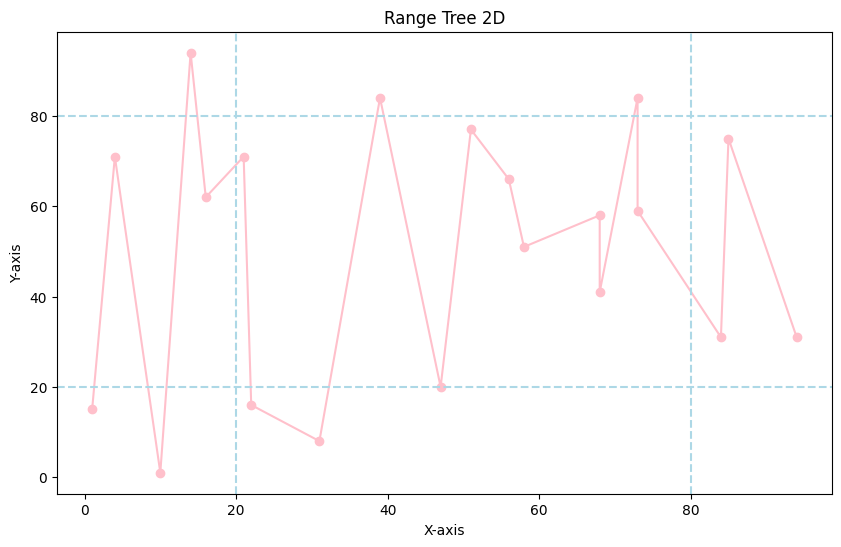

Number of points in range [20-80, 20-80]: 24
Memory usage for 50 points: 594.7421875 MB


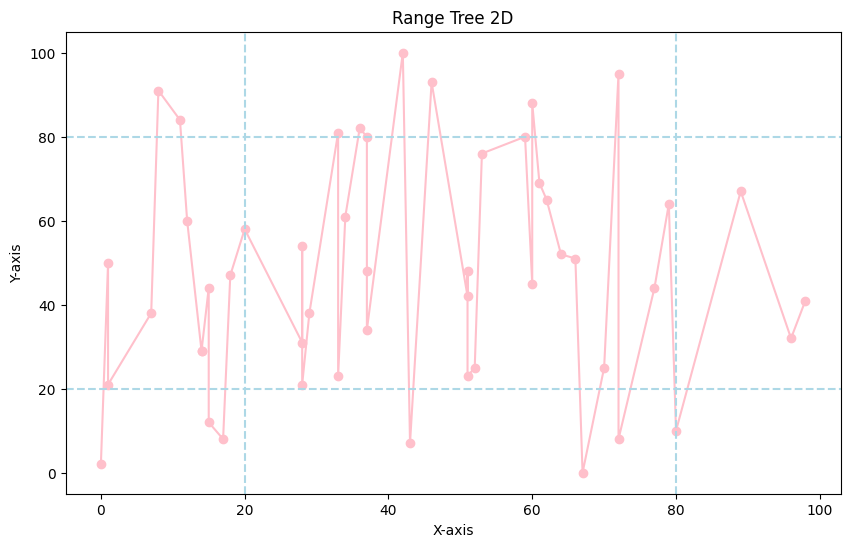

Number of points in range [20-80, 20-80]: 362
Memory usage for 1000 points: 595.0 MB


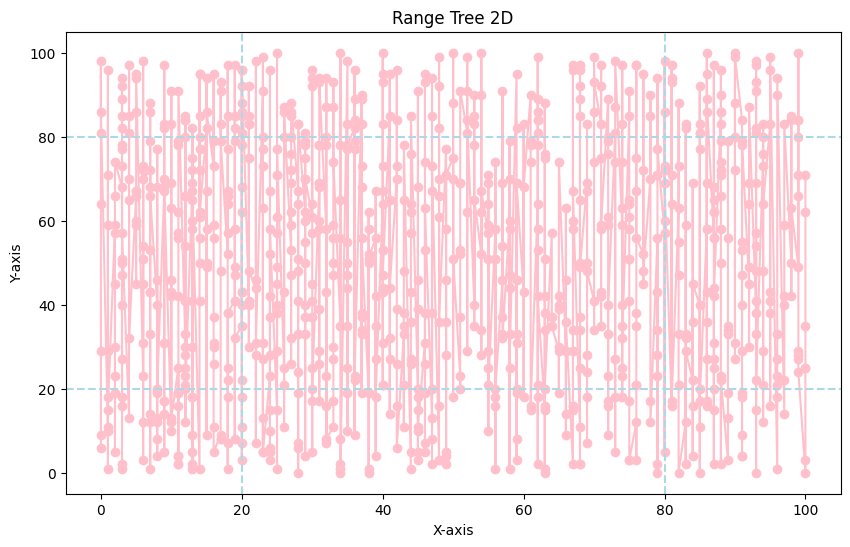

Number of points in range [20-80, 20-80]: 3680
Memory usage for 10000 points: 597.578125 MB


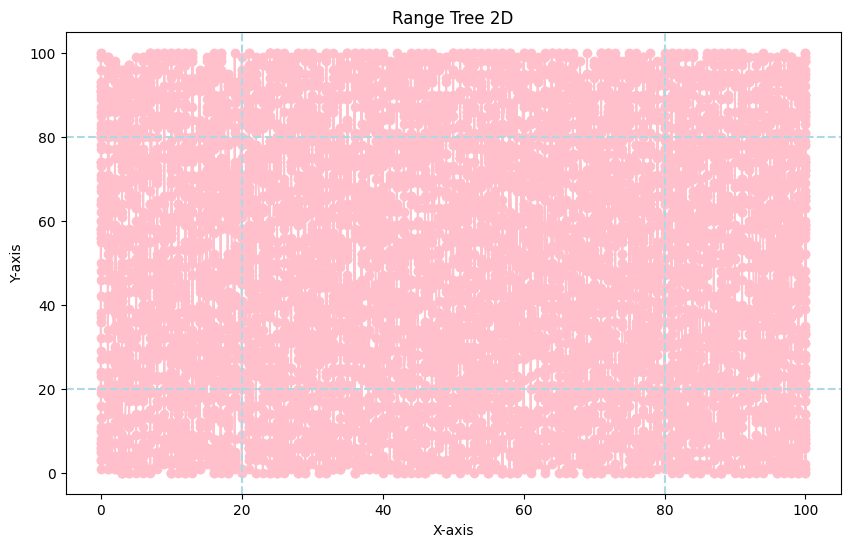

Number of points in range [20-80, 20-80]: 36327
Memory usage for 100000 points: 622.32421875 MB


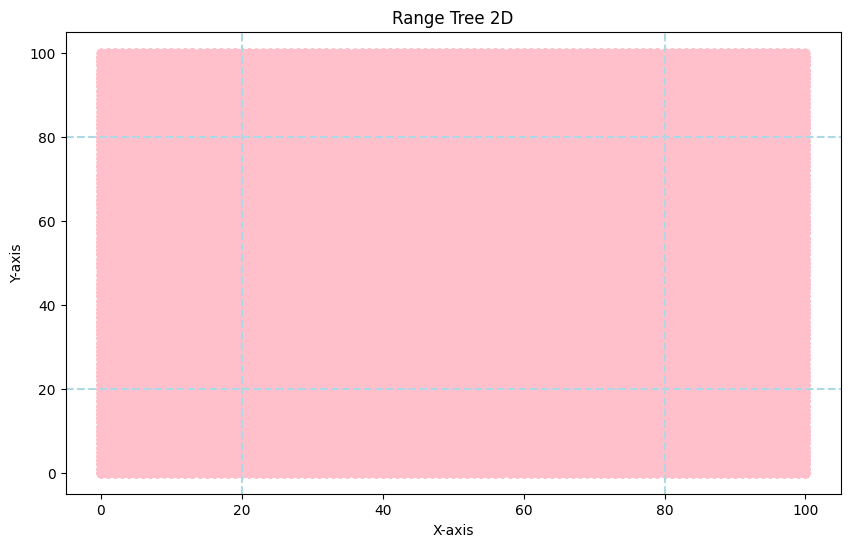

Number of points in range [20-80, 20-80]: 364754
Memory usage for 1000000 points: 564.86328125 MB


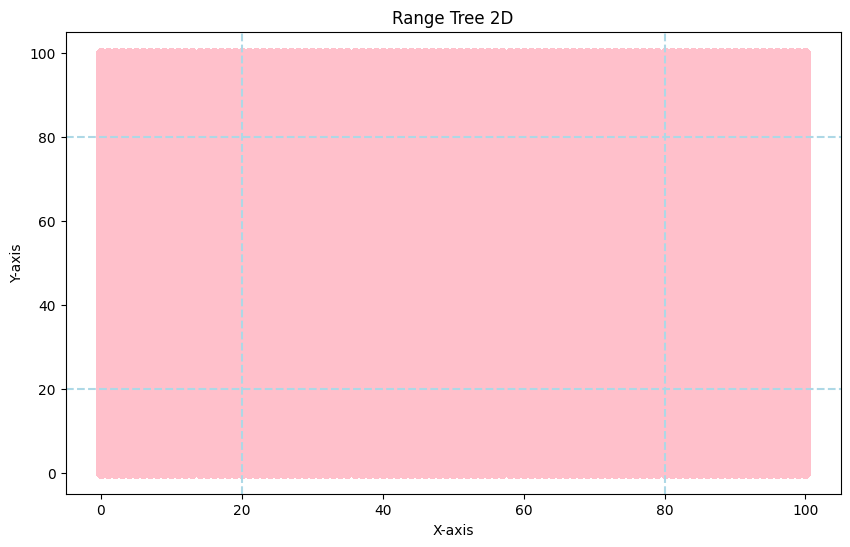

In [29]:
def main():
    tests = [20, 50, 1000, 10000, 100000, 1000000]
    for num_points in tests:
        points = generate_points(num_points)
        tree = RangeTree2D(points)
        x1, x2, y1, y2 = 20, 80, 20, 80

        result = tree.query_range(tree.root, x1, x2, y1, y2)
        print(f"Number of points in range [{x1}-{x2}, {y1}-{y2}]: {result}")

        #Pomiar zużycia pamięci
        memory_usage = psutil.Process().memory_info().rss
        memory_usage_mb = memory_usage / 1024 / 1024

        print(f"Memory usage for {num_points} points: {memory_usage_mb} MB")

        visualize_range_query(points, x1, x2, y1, y2)

if __name__ == "__main__":
    main()